In [1]:
# Import needed tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings ("ignore", category = UserWarning)
from tabulate import tabulate

In [2]:
# Load the cleaned data from the data collection process
df = pd.read_csv('wendigoon_channel_cleaned_data.csv')

In [3]:
# Check the column titles for later EDA and predictive analysis
print(df.columns)

Index(['Title', 'Date & Time Created', 'View Count', 'Comment Count',
       'Like Count'],
      dtype='object')


In [4]:
# Remove trailing spaces from column names
df.columns = df.columns.str.strip()
# Rename the columns
rename_dict = {
    'Title': 'title',
    'Date & Time Created': 'date_time_created',
    'View Count': 'view_count',
    'Comment Count': 'comment_count',  
    'Like Count': 'like_count'       
}

# Rename the columns using the dictionary
df.rename(columns=rename_dict, inplace=True)

# Verify changes
print(df.head())

                                               title date_time_created  \
0  Lovecraft's Cosmic Horror - The Story of Call ...    6/7/2024 19:28   
1  Government Cheese Tunnels & The "Got Milk?" Co...   5/13/2024 19:20   
2             The Weirdest & Coolest Cryptids So Far    4/22/2024 1:40   
3              The Most Underrated Book of the Bible    4/8/2024 23:12   
4  The Strange, Cosmic Horror of Junji Ito's Uzumaki   3/31/2024 20:52   

   view_count  comment_count  like_count  
0     1046713           6565       62236  
1     1614447           9588      105983  
2      989167           3362       49172  
3      933601           7594       75656  
4     2163660           8651      103470  


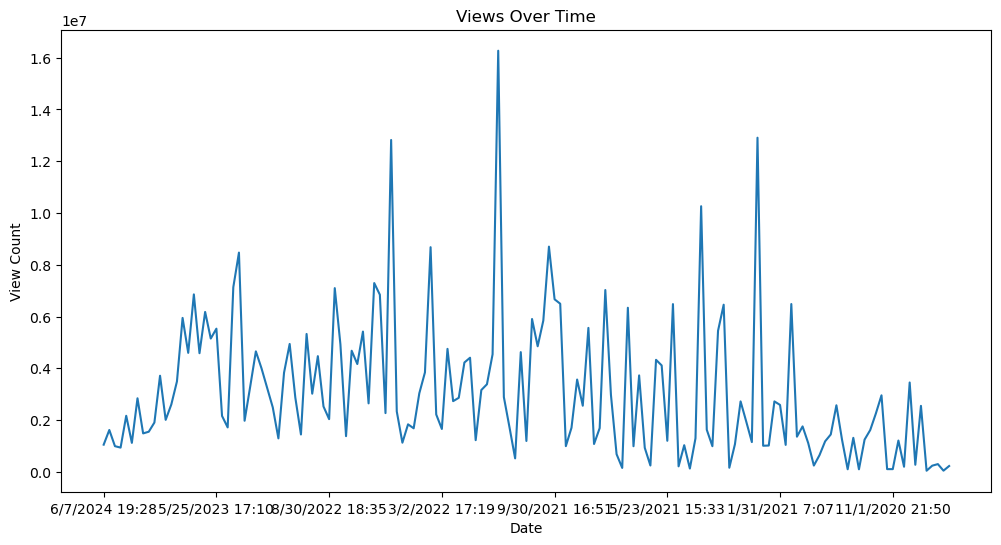

In [6]:
# Line chart to demonstrate view count over time
plt.figure(figsize=(12,6))
df.set_index('date_time_created')['view_count'].plot()
plt.title('Views Over Time')
plt.xlabel('Date')
plt.ylabel('View Count')
plt.show()

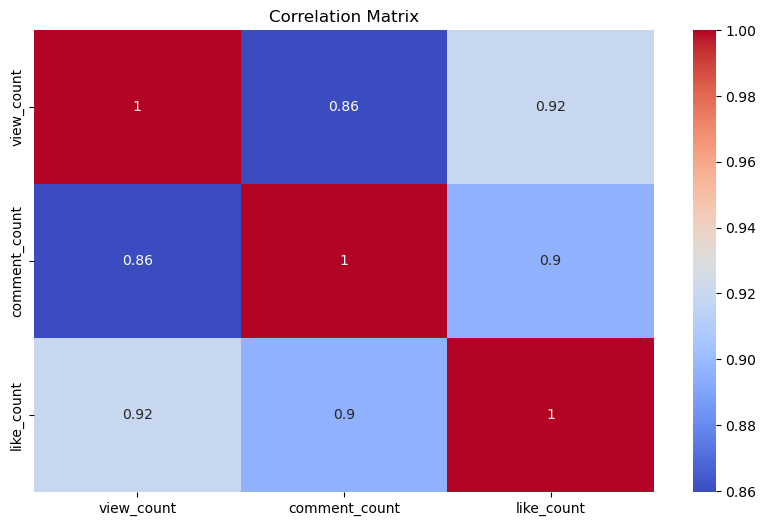

In [7]:
# Correlation heatmap to demonstrate the relationship among view count, like count, and comment count
plt.figure(figsize=(10,6))
sns.heatmap(df[['view_count', 'comment_count', 'like_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Change the Date & Time Created column to the right form
df['date_time_created'] = pd.to_datetime(df['date_time_created'], errors='coerce')

# Verify changes
print(df.head())

                                               title   date_time_created  \
0  Lovecraft's Cosmic Horror - The Story of Call ... 2024-06-07 19:28:00   
1  Government Cheese Tunnels & The "Got Milk?" Co... 2024-05-13 19:20:00   
2             The Weirdest & Coolest Cryptids So Far 2024-04-22 01:40:00   
3              The Most Underrated Book of the Bible 2024-04-08 23:12:00   
4  The Strange, Cosmic Horror of Junji Ito's Uzumaki 2024-03-31 20:52:00   

   view_count  comment_count  like_count  
0     1046713           6565       62236  
1     1614447           9588      105983  
2      989167           3362       49172  
3      933601           7594       75656  
4     2163660           8651      103470  


In [9]:
# Extract features year, month, day, and hour from date_time_created
df['year'] = df['date_time_created'].dt.year
df['month'] = df['date_time_created'].dt.month
df['day'] = df['date_time_created'].dt.day
df['hour'] = df['date_time_created'].dt.hour

# Verify changes
print(df.head())

                                               title   date_time_created  \
0  Lovecraft's Cosmic Horror - The Story of Call ... 2024-06-07 19:28:00   
1  Government Cheese Tunnels & The "Got Milk?" Co... 2024-05-13 19:20:00   
2             The Weirdest & Coolest Cryptids So Far 2024-04-22 01:40:00   
3              The Most Underrated Book of the Bible 2024-04-08 23:12:00   
4  The Strange, Cosmic Horror of Junji Ito's Uzumaki 2024-03-31 20:52:00   

   view_count  comment_count  like_count  year  month  day  hour  
0     1046713           6565       62236  2024      6    7    19  
1     1614447           9588      105983  2024      5   13    19  
2      989167           3362       49172  2024      4   22     1  
3      933601           7594       75656  2024      4    8    23  
4     2163660           8651      103470  2024      3   31    20  


In [10]:
## Build and train a model using simple linear regression to predict views based on specific features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select features and target
features = ['comment_count', 'like_count', 'year', 'month', 'day', 'hour']
target = 'view_count'

# Split data into training and testing sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
df['predicted_views'] = model.predict(X)

# Save the updated DataFrame to a new CSV
df.to_csv('wendigoon_channel_data_with_predictions.csv', index=False)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 740466350742.7422
R-squared: 0.7820044685985168


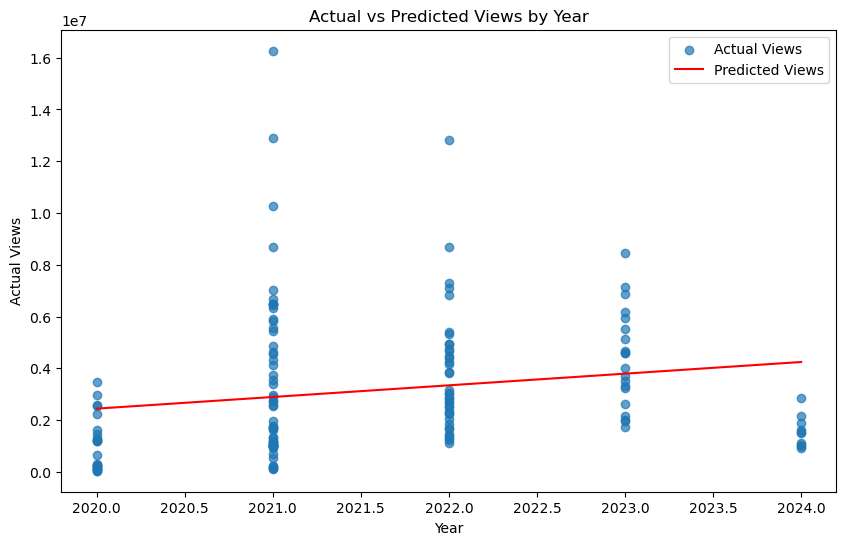

In [13]:
# Fit a new model for the regression line using year as the independent variable
year_model = LinearRegression()
year_model.fit(df[['year']], df['predicted_views'])

# Create a range of years for plotting the regression line
year_range = np.linspace(df['year'].min(), df['year'].max(), 100).reshape(-1, 1)
predicted_view_range = year_model.predict(year_range)

## Create a scatter plot to demonstrate actual view count and predicted view count by year
plt.figure(figsize=(10, 6))

# Scatter plot for actual view count by year
plt.scatter(df['year'], df['view_count'], alpha=0.7, label='Actual Views')

# Regression line for predicted view count by year
plt.plot(year_range, predicted_view_range, color='red', label='Predicted Views')

plt.xlabel('Year')
plt.ylabel('Actual Views')
plt.title('Actual vs Predicted Views by Year')
plt.legend()
plt.show()

In [14]:
# Fit the model with 'year' as the feature and 'view_count' as the target
year_model = LinearRegression()
year_model.fit(df[['year']], df['view_count'])

# Single prediction for view count in 2025
single_year = 2025
single_prediction = year_model.predict(np.array([[single_year]]))
print(f"Single prediction for the year {single_year}: {single_prediction[0]} views")


Single prediction for the year 2025: 4610499.525376558 views


In [15]:
# Multiple predictions for view count in a range of 5 years (2025 to 2030)
years_range = np.arange(2025, 2031).reshape(-1, 1)  # Reshaping to make it 2D
multiple_predictions = year_model.predict(years_range)

print("Multiple predictions for each year:")
for year, prediction in zip(range(2025, 2031), multiple_predictions):
    print(f"Year: {year} | Predicted Views: {prediction}")

Multiple predictions for each year:
Year: 2025 | Predicted Views: 4610499.525376558
Year: 2026 | Predicted Views: 5047963.8446314335
Year: 2027 | Predicted Views: 5485428.163886428
Year: 2028 | Predicted Views: 5922892.483141422
Year: 2029 | Predicted Views: 6360356.802396417
Year: 2030 | Predicted Views: 6797821.121651292
